In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

# Load your DataFrame from a xlsx file
df = pd.read_csv('data/injuries.csv')

# count and percentage of region
region_counts = df['Region'].value_counts()
region_percentages = df['Region'].value_counts(normalize=True) * 100

# results in table print as a DataFrame
region_summary = pd.DataFrame({
    'Count': region_counts,
    'Percentage': region_percentages
}).reset_index()

display(region_summary)

# Group by Region and Bone to calculate counts and percentages
region_bone_summary = df.groupby(['Region', 'Bone']).size().reset_index(name='Count')
region_bone_summary['Percentage'] = region_bone_summary.groupby('Region')['Count'].transform(lambda x: x / x.sum() * 100)

# Prepare data for the desired format
region_bone_summary['Formatted Count'] = region_bone_summary.apply(
    lambda row: f"{row['Count']} ({row['Percentage']:.1f}%)", axis=1
)

# Calculate overall percentages for each region
region_totals = region_bone_summary.groupby('Region')['Count'].sum()
region_bone_summary['Overall Percentage'] = region_bone_summary['Region'].map(
    lambda region: f"{region_totals[region]} ({(region_totals[region] / region_totals.sum() * 100):.1f}%)"
)

# Format the output
formatted_summary = region_bone_summary[['Region', 'Bone', 'Formatted Count', 'Overall Percentage']].rename(
    columns={'Formatted Count': 'No. of fractures (%)', 'Overall Percentage': 'Overall No. of fractures (%)'}
)

# Display the formatted summary
display(formatted_summary)


,Region,Count,Percentage
0,Lower-limb,97,60.248447
1,Upper-Limb,59,36.645963
2,Spine,4,2.484472
3,Pelvis,1,0.621118


,Region,Bone,No. of fractures (%),Overall No. of fractures (%)
0,Lower-limb,Femur,18 (18.6%),97 (60.2%)
1,Lower-limb,Fibula,22 (22.7%),97 (60.2%)
2,Lower-limb,Foot,8 (8.2%),97 (60.2%)
3,Lower-limb,Patella,1 (1.0%),97 (60.2%)
4,Lower-limb,Tibia,48 (49.5%),97 (60.2%)
5,Pelvis,Pelvis,1 (100.0%),1 (0.6%)
6,Spine,C-Spine,4 (100.0%),4 (2.5%)
7,Upper-Limb,Hand,5 (8.5%),59 (36.6%)
8,Upper-Limb,Humerus,16 (27.1%),59 (36.6%)
9,Upper-Limb,Radius,31 (52.5%),59 (36.6%)


In [2]:
# total fractures 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

# Load your DataFrame from a xlsx file
df = pd.read_csv('data/injuries.csv')
# print total

total_fractures = df['Bone'].count()
print(f"Total fractures: {total_fractures}")

Total fractures: 161


C:\Users\user\AppData\Local\Temp\ipykernel_3492\3253680361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Bone', order=df['Bone'].value_counts().index, palette='viridis')


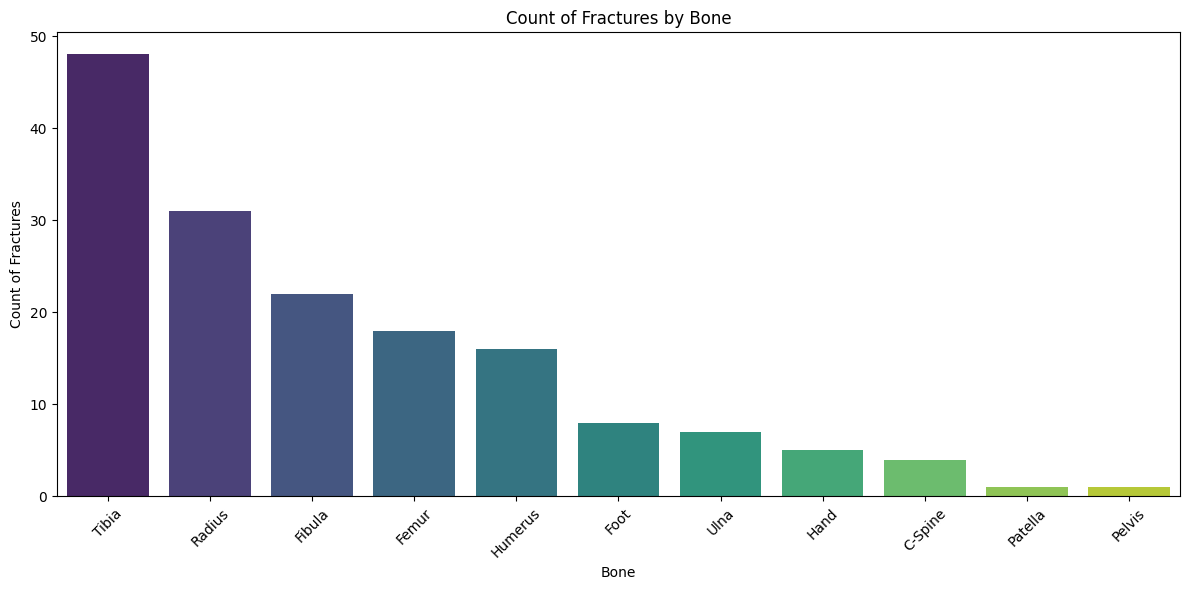

C:\Users\user\AppData\Local\Temp\ipykernel_3492\3253680361.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bone_counts.index, y=bone_percentages.values, palette='viridis')


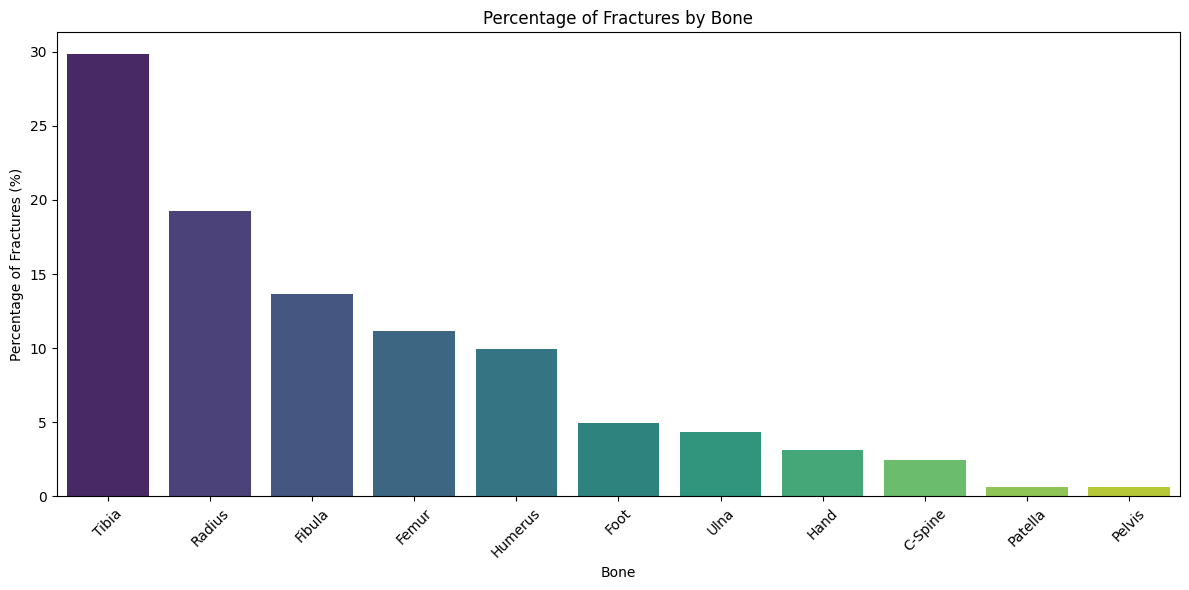

In [4]:
# Visualize bar chart Bones
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Bone', order=df['Bone'].value_counts().index, palette='viridis')
plt.title('Count of Fractures by Bone')
plt.xlabel('Bone')
plt.ylabel('Count of Fractures')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# percentage of fractures by Bone
bone_counts = df['Bone'].value_counts()
bone_percentages = df['Bone'].value_counts(normalize=True) * 100

# visualize bone percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=bone_counts.index, y=bone_percentages.values, palette='viridis')
plt.title('Percentage of Fractures by Bone')
plt.xlabel('Bone')
plt.ylabel('Percentage of Fractures (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Cross-tabulate the two columns Region and Bone

region_bone_counts = pd.crosstab(df['Region'], df['Limb'])

# Add a total column for all bones
region_bone_counts['All Bones'] = region_bone_counts.sum(axis=1)

# Add percentage to the table
region_bone_counts_percentage = region_bone_counts.div(region_bone_counts['All Bones'], axis=0) * 100
region_bone_counts_percentage = region_bone_counts_percentage.round(2)

# Combine counts and percentages into a single table
combined_region_bone_table = region_bone_counts.astype(str) + " (" + region_bone_counts_percentage.round(1).astype(str) + "%)"

# Display the combined table
display(combined_region_bone_table)



Limb,Both,Left,Right,All Bones
Region,,,,
Lower-limb,4 (4.1%),39 (40.2%),54 (55.7%),97 (100.0%)
Pelvis,1 (100.0%),0 (0.0%),0 (0.0%),1 (100.0%)
Spine,3 (75.0%),0 (0.0%),1 (25.0%),4 (100.0%)
Upper-Limb,7 (11.9%),32 (54.2%),20 (33.9%),59 (100.0%)


In [4]:
region_bone_counts = pd.crosstab(df['Region'], df['roles'])
region_bone_counts['All Bones'] = region_bone_counts.sum(axis=1)
region_bone_counts_percentage = region_bone_counts.div(region_bone_counts['All Bones'], axis=0) * 100
region_bone_counts_percentage = region_bone_counts_percentage.round(2)
combined_region_bone_table = region_bone_counts.astype(str) + " (" + region_bone_counts_percentage.round(1).astype(str) + "%)"
# Display the combined table
display(combined_region_bone_table)

roles,Passenger:,Pedestrian:,operator,All Bones
Region,,,,
Lower-limb,38 (39.2%),15 (15.5%),44 (45.4%),97 (100.0%)
Pelvis,1 (100.0%),0 (0.0%),0 (0.0%),1 (100.0%)
Spine,3 (75.0%),0 (0.0%),1 (25.0%),4 (100.0%)
Upper-Limb,23 (39.0%),11 (18.6%),25 (42.4%),59 (100.0%)


### Notes on Anatomical Region Analysis

1. **Region Distribution**:
    - The majority of fractures are observed in the **Lower-limb** region, accounting for **60.2%** of the total fractures.
    - The **Upper-Limb** region follows with **36.6%** of the fractures.
    - The **Spine** and **Pelvis** regions have significantly fewer fractures, contributing **2.5%** and **0.6%**, respectively.

2. **Bone-Specific Observations**:
    - In the **Lower-limb**, the **Tibia** has the highest number of fractures (**49.5%**), followed by the **Fibula** (**22.7%**) and **Femur** (**18.6%**).
    - The **Upper-Limb** region shows the **Radius** as the most frequently fractured bone (**52.5%**), followed by the **Humerus** (**27.1%**) and **Ulna** (**11.9%**).

3. **Rare Fractures**:
    - Fractures in the **Pelvis** and **Spine** regions are rare, with only **1** and **4** cases, respectively.

4. **Role-Based Observations**:
    - Among the roles, **Passenger** accounts for the majority of fractures in all regions, with **39.2%** in the **Lower-limb**, **39.0%** in the **Upper-Limb**, and **75.0%** in the **Spine**.
    - **Pedestrian** fractures are less frequent, with **15.5%** in the **Lower-limb** and **18.6%** in the **Upper-Limb**.
    - **Operator** fractures are significant in the **Lower-limb** (**45.4%**) and **Upper-Limb** (**42.4%**).

5. **Overall Summary**:
    - The **Lower-limb** region dominates the fracture statistics, highlighting its vulnerability, possibly due to its weight-bearing function.
    - The **Upper-Limb** region also shows a significant number of fractures, likely due to its involvement in various activities and accidents.
    - The **Spine** and **Pelvis** regions, while less frequent, may indicate severe trauma when fractures occur.
    - Role-based analysis provides additional insights into the distribution of fractures, which can guide targeted preventive measures.

This analysis provides insights into the distribution and frequency of fractures across different anatomical regions and roles, which can guide medical resource allocation and preventive strategies.